# Vórtices potenciais e sustentação aerodinâmica

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 30 de Março de 2022

O objetivo deste `Notebook` é introduzir o conceito de *vórtices potenciais* e assim apresentar um dos conceitos mais importantes no âmbito da Aerodinâmica Clássica, a *sustentação aerodinâmica*. Além disso, este `Notebook` serve como uma continuação do `Notebook`: [Fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) [1] e faz parte da série de `Notebooks` escritos por mim relativos à Aerodinâmica Clássica Computacional.

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em quatro seções (três seções expositivas mais uma seção extra):

1. **Vórtices;**

Nesta seção serão discutidos os conceitos relativos à *vórtices* que por sua vez são indispensáveis para a sustentação aerodinâmica. Aqui será feito todo o embasamento teórico seguido de uma simulação computacional de um vórtice e da combinação de um vórtice com um sumidouro.

2. **Linha infinita de vórtices;**

Nesta segunda seção iremos discutir a configuração de uma linha infinita de vórtices. Esta seção será puramente matemática, ou seja, não haverão células de código em Python para simular essa configuração aerodinâmica. Entretanto, será apresentado todo o passo a passo computacional necessário para elaborar tal simulação.

3. **Sustentação de um cilindro;**

Nesta penúltima seção será mostrado como as ferramentas matemáticas e físicas discutidas anteriormente podem ser usadas para gerar a *sustentação* de um cilindro. Além disso, será apresentado o famoso *efeito Magnus* bem como uma discussão relativa à influência de um vórtice no coeficiente de pressão.

4. **Para raciocinar um pouco mais: A transformação de Joukowski**

Por fim, nesta seção será apresentada a poderosa *transformação de Joukowski* da Análise Complexa. Esta seção é puramente opcional e visa estimular um aprofundamento dos conceitos abordados nas seções anteriores por meio de uma aplicação direta destes conceitos juntamente com a transformação de Joukowski em problemas práticos de Aerodinâmica.

**OBS**: Ao final de algumas seções, há uma pequena subseção intitulada **Para refletir...** e/ou **Para exercitar...** com alguns problemas conceituais e computacionais interessantes a se pensar acerca do conteúdo explorado naquela seção.

## Pré-requisitos

Este `Notebook` faz parte da série de `Notebooks` relativos à *Dinâmica dos Fluídos e Aerodinâmica* escritos por mim. Em particular, faz parte da série que visa servir como uma breve introdução à Aerodinâmica Clássica Computacional. Dessa forma, é recomendável que o leitor tenha lido ao menos o `Notebook` [fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) [1] (que por sua vez depende dos outros dois `Notebooks` de Dinâmica dos Fluídos/Aerodinâmica anteriores) para facilitar a compreensão dos conceitos abordados neste `Notebook`.

### Importando as bibliotecas

A função `opt_plot()` é praticamente onipresente em todos os `Notebooks` que eu escrevo. Por isso, vamos defini-lá logo no ínicio junto com as bibliotecas necessárias.

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length = 5,width = 1,labelsize = 15)
    plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length = 8,width = 1,labelsize = 15)

Curiosamente, na contramão dos outros `Notebooks`, para a realização deste em particular será necessário uma quantidade muito diminuta de bibliotecas (apenas duas) que serão apenas as bibliotecas fundamentais necessárias para a realização de qualquer `Notebook` (não se preocupe com as bibliotecas `IPython` e `datetime`, elas não são essenciais para o que será abordado aqui). 

Note que precisamos apenas do básico para trabalhar com Aerodinâmica Clássica.

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19043
Matplotlib 3.5.1
Numpy 1.22.2
Sat Mar 19 15:41:22 2022 Hora Padrão da Bahia

Para instalar a magic extension `%version_information` do `IPython` usando o `pip`, execute a seguinte linha de comando em um terminal de sua preferência:

```Python
pip install version_information
```

Dado o exposto, vamos ao `Notebook` propriamente dito.

---

## 1. Vórtices

Qual é a coisa mais importante da aerodinâmica aplicada? Fazer as coisas voarem, é claro! E para voar, deve haver uma força de *sustentação aerodinâmica* para neutralizar o peso do objeto. Nesta primeira seção, vamos aprender sobre sustentação. Primeiramente, vamos calcular o fluxo de um vórtice potencial. Acontece que a circulação de um vórtice e a sustentação estão intimamente relacionados.

### 1.1 O que é um vórtice?

Acredite, essa pergunta é muito mais profunda do que você imagina! A resposta mais simples é que um vórtice é um movimento em linhas de corrente circulares. Imagine linhas de corrente que são círculos concêntricos em torno de um determinado ponto - o que é confuso é que *isso não significa* que os próprios elementos fluídos estão girando!

Em um vórtice irrotacional, a velocidade tangencial é constante ao longo de uma linha de corrente (circular) e inversamente proporcional ao raio, enquanto a velocidade radial é zero. Em coordenadas polares:

$$u_{\theta}(r,\theta)=\frac{\text{constante}}{r}$$

$$u_{r}(r,\theta)=0$$

A vorticidade é zero em todos os lugares, exceto na localização do ponto vórtice, onde a derivada de $u_{\theta}$ é infinita.

No `Notebook` sobre *[fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb)* [1], introduzimos o conceito de circulação. Vamos usar isso. Em torno de qualquer linha de corrente circular envolvendo o vórtice, e usando a convenção de sinais de que um vórtice negativo circula no sentido anti-horário, temos:

$$\Gamma=-\oint\textbf{v}\cdot d\overrightarrow{\ell}=-u_{\theta} 2\pi r$$

Assim, a constante na expressão para $u_{\theta}$ é igual a $\frac{\Gamma}{2\pi}$, e agora escrevemos:

$$u_{\theta}(r,\theta)=\frac{\Gamma}{2\pi r}$$

Podemos obter a função de fluxo integrando os componentes da velocidade:

$$\psi(r,\theta)=\frac{\Gamma}{2\pi}\ln{r}$$

Em coordenadas cartesianas, a função de fluxo é

$$\psi(x,y)=\frac{\Gamma}{4\pi}\ln{(x^{2}+y^{2})}$$

cujas componentes da velocidade serão:

$$u(x,y)=\frac{\Gamma}{4\pi}\frac{y}{x^{2}+y^{2}}$$

$$v(x,y)=-\frac{\Gamma}{4\pi}\frac{x}{x^{2}+y^{2}}$$

Esse fluxo é irrotacional em todos os pontos, exceto no centro do vórtice, onde é infinito. A força do vórtice pontual é igual à circulação $\Gamma$ em torno dele.

### 1.2 Vamos computar um vórtice

A configuração é a mesma de antes: criamos uma grade de pontos para avaliar o campo de velocidade.

In [3]:
N = 50                               
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = np.linspace(x_start, x_end, N)    
y = np.linspace(y_start, y_end, N)           

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x, y)  

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

Damos ao vórtice uma força de $\Gamma=5$ e o colocamos no centro do domínio:

In [4]:
Gamma = 5.0                      
x_vortex, y_vortex = 0.0, 0.0   

Vamoms definir duas funções:

- ```Python
get_velocity_vortex()
```
- ```Python
get_stream_function_vortex()
```

Essas funções irão calcular as componentes da velocidade e a função de fluxo em nossa grade cartesiana, dada a força e a localização do vórtice. Em seguida, usaremos nossas funções personalizadas para avaliar tudo nos pontos da grade. Vamos escrever essas funções primeiro.

In [5]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = +strength / (2 * np.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * np.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v



def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength / (4 * np.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

Agora, chamamos as funções com a força e posição do vórtice, mais as coordenadas da grade de avaliação, para obter a velocidade e a função de fluxo do vórtice.

In [6]:
u_vortex, v_vortex = get_velocity_vortex(Gamma, x_vortex, y_vortex, X, Y)

psi_vortex = get_stream_function_vortex(Gamma, x_vortex, y_vortex, X, Y)

Agora somos capazes de visualizar as linhas de corrente de um vórtice, e elas se parecem com círculos concêntricos ao redor do centro do vórtice, como esperado.

<IPython.core.display.Javascript object>


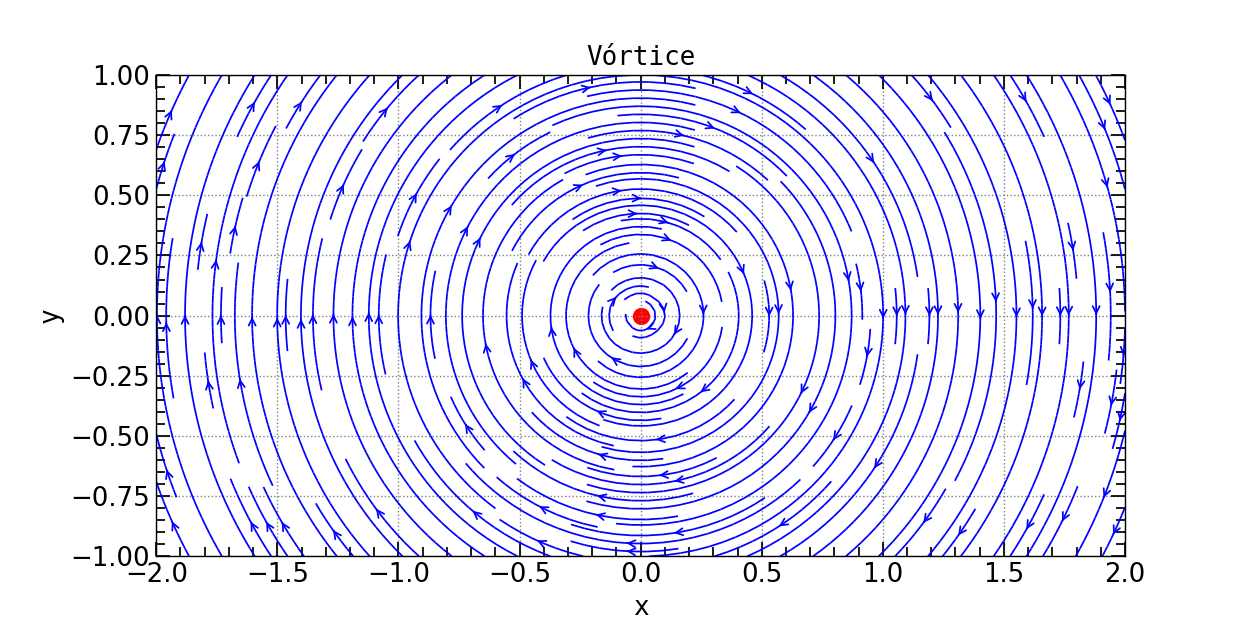

In [7]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))
plt.streamplot(X, Y, u_vortex, v_vortex,
                  color = 'blue', density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
plt.scatter(x_vortex, y_vortex, color = 'red', s = 80, marker = 'o')

plt.title('Vórtice', family = 'monospace', fontsize = 15)
plt.xlabel('x', family = 'monospace', fontsize = 15)
plt.ylabel('y', family = 'monospace', fontsize = 15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

opt_plot()

plt.savefig('Vórtice.png', dpi = 600, format = 'png')

### 1.3 Vórtices & Simudouros

Por diversão, vamos usar nossos poderes de superposição. Adicione um vórtice a um sumidouro, usando duas novas funções para calcular as componentes de velocidade e a função de fluxo do sumidouro, e somando às de um vórtice (lembre-se que o sumidouro pode ser facilmente substituído por uma fonte apenas mundando o sinal da força).

In [8]:
strength_sink = -1.0            
x_sink, y_sink = 0.0, 0.0       

Agora definimos as duas funções:

In [9]:
def get_velocity_sink(strength, xs, ys, X, Y):
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v



def get_stream_function_sink(strength, xs, ys, X, Y):
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

Analogamente ao que foi feito anteriormente, chamamos as funções com a força e posição do sumidouro (ou da fonte), mais as coordenadas da grade de avaliação, para obter a velocidade e a função de fluxo do vórtice.

In [10]:
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

Aplicamos o princípio da superposição no nosso par vórtice-sumidouro:

In [11]:
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

Agora, vamos visualizar as linhas do par vórtice-sumidouro e admirar a nossa ciração artística:

<IPython.core.display.Javascript object>


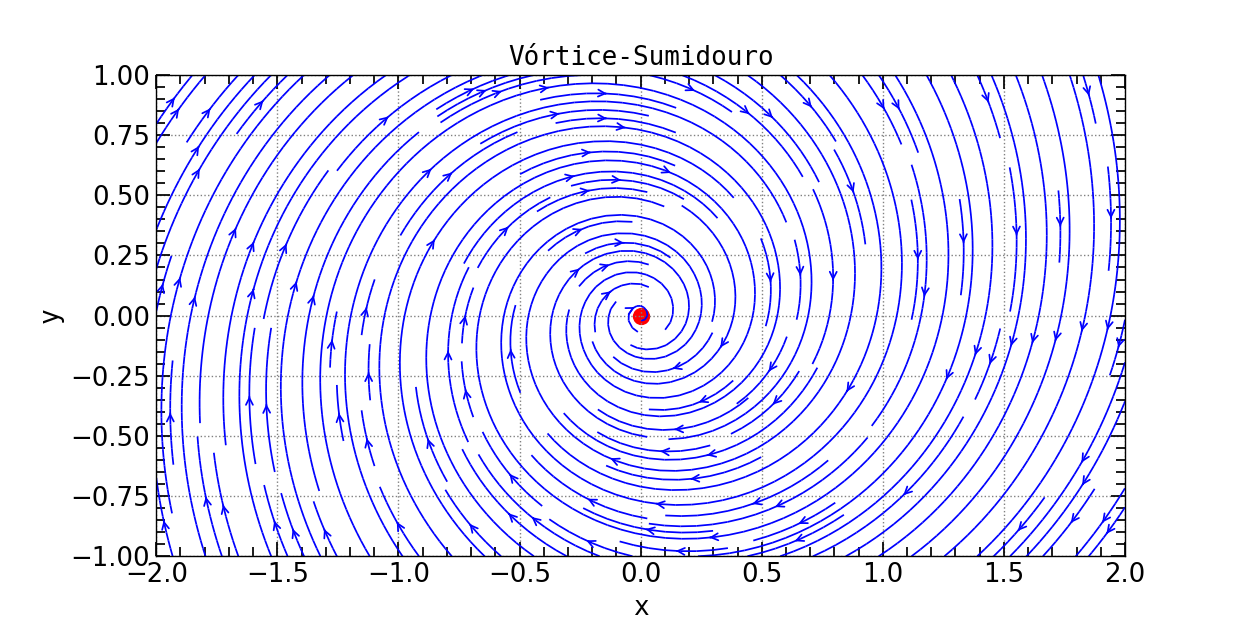

In [12]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize = (width, height))
plt.streamplot(X, Y, u, v, 
               color = 'blue', density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
plt.scatter(x_vortex, y_vortex, color = 'red', s = 80, marker = 'o')

plt.title('Vórtice-Sumidouro', family = 'monospace', fontsize = 15)
plt.xlabel('x', family = 'monospace', fontsize = 15)
plt.ylabel('y', family = 'monospace', fontsize = 15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

opt_plot()

plt.savefig('Vórtice-Sumidouro.png', dpi = 600)

Muito legal essa [op-art](https://www.youtube.com/watch?v=5I_RdC21GaE) que acabamos de criar. É um bom modelo para o típico vórtice de uma banheira ou de uma pia. Mas a pergunta que não quer calar: *isso tudo é útil para alguma coisa?* A resposta é **sim**!

Primeiramente, vamos tirar nossas rodinhas e - por conta própria - calcula o fluxo de uma *fileira infinita de vórtices*. Sua missão, caso você a aceite, está na próxima seção.

Depois disso, aprenderemos sobre a conexão entre um vórtice e a força de sustentação. Isso acaba sendo muito importante na aerodinâmica!

### 1.4 O que é esse vórtice _"irrotacional"_?

Eu sei o que você deve estar pensando.

O que exatamente significa dizer que um vórtice é irrotacional? Certamente se há um vórtice, há rotação!

Você não é louco(a). É natural pensar assim, mas o vórtice potencial é um fluxo onde as linhas de corrente são circulares, mas os elementos fluídos não rotacionam em torno de si mesmos - eles apenas percorrem o caminho circular.

Esse vídeo clássico [2] irá ajudá-lo a entender... basta assistir os 25 segundos de vídeo após 4min25s, e ver um "medidor de vorticidade" gorar em torno de um vórtice livre sem girar em torno de si mesmo.

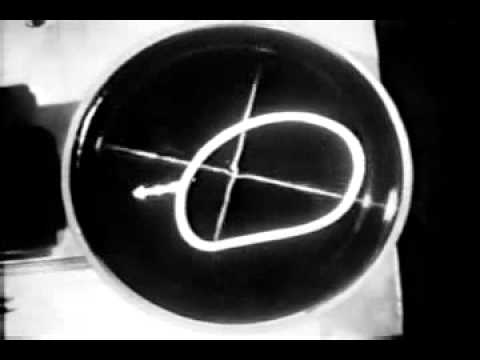

In [13]:
start = int(timedelta(hours = 0, minutes = 4, seconds = 25).total_seconds())

YouTubeVideo("loCLkcYEWD4", start = start)

Lmebre-se: a vorticidade mede a velocidade angular local de cada elemento de fluído. Se os elementos fluídos percorrem um caminho circular, mas não giram sozinhos, não há vorticidade!

Esta animação da [Wikipedia](https://en.wikipedia.org/wiki/Vortex#Irrotational_vortices) [3] ajuda a ilustrar ainda mais o que acontece em um vórtice irrotacional: os marcadores laranjas com uma linha entre eles estão girando em círculos, mas eles nao estão girando (observe que as linhas brancas mantêm a sua orientação).

![image](https://media.giphy.com/media/dRyBviuWfnY1VKDoyj/giphy.gif)

---

## 2. Linha infinita de vórtices

Nesta seção vamos tentar visualizar as linhas de corrente em torno de uma fileira infinita de vórtices. Primeiro, iremos considerar o caso de um número finito de vórtices, obtidos por superposição simples. Ao adicionar mais e mais vórtices, será possível ver como o padrão de fluxo se aproxima de uma fileira infinita de vórtices. Mas simpre haverá algumas diferenças.

É possível derivar uma expressão analítica para o caso infinito, e a derivação é fornecida abaixo. Com esta expressão analítica, é possível visualizar as linhas de corrente para o caso infinito. Observe e pense: *como as linhas de corrente diferem de um caso para o outro?*

Esta seção será puramente teórica, ou seja, não haverá partes contendo códigos em Python. Aqui iremos estudar a teoria por trás desse tema, pensar em como implementá-la de maneira eficiente e somente então, codificá-la e visualizar os resultados. 

### 2.1 Fluxo de um vórtice 

Antes de qualquer coisa, uma pequena revisão do básico. Como visto na seção anterior, um vórtice de força $\Gamma$ tem uma função de fluxo $\psi$ e um potencial de velocidade $\phi$ dados por:

$$\psi=\frac{\Gamma}{2\pi}\ln{r}$$

$$\phi=-\frac{\Gamma}{2\pi}\theta$$

Podemos derivar os componentes da velocidade em um sistema de coordenadas polares, como segue:

$$u_{r}(r,\theta)=0$$

$$u_{\theta}(r,\theta)=-\frac{\Gamma}{2\pi r}$$

Em um sistema de coordenadas cartesianas, as componentes da velocidade em $(x,y)$ em torno de um vórtice de força $\Gamma$ localizado em $(x_{vortex},y_{vortex})$, são dadas por

$$u(x,y)=+\frac{\Gamma}{2\pi}\frac{y-y_{vortex}}{(x-x_{vortex})^{2}+(y-y_{vortex})^{2}}$$

$$v(x,y)=-\frac{\Gamma}{2\pi}\frac{x-x_{vortex}}{(x-x_{vortex})^{2}+(y-y_{vortex})^{2}}$$

e a função de fluxo pode ser escrita como

$$\psi(x,y)=\frac{\Gamma}{2\pi}\ln{[(x-x_{vortex})^{2}+(y-y_{vortex})^{2}]}$$

### 2.2 Superposição de vários vórtices

Vamos considerar um exemplo útil para ilustrar o conceito de uma *folha de vórtices*: uma fileira infinita de vórtices de igual força $\Gamma$ (mesmo sinal e magnitude) uniformemente espaçados por uma distância $a$. Mas vamos começar com uma linha finita de vórtices primeiro.

A função de fluxo $\psi_{i}$ do $i$-ésimo vórtice a uma distância $r_{i}$ é dada por

$$\psi_{i}=\frac{\Gamma}{2\pi}\ln{r_{i}}$$

Aplicando o princípio da superposição, a função de fluxo de $N$ vórtices será

$$\psi=\frac{\Gamma}{2\pi}\sum_{i=1}^{N}\ln{r_{i}}$$

E o campo de velocidade (em coordenadas cartesianas) da linha de vórtices é

$$u(x,y)=+\frac{\Gamma}{2\pi}\sum_{i=1}^{N}\frac{y-y_{i}}{(x-x_{i})^{2}+(y-y_{i})^{2}}$$

$$u(x,y)=-\frac{\Gamma}{2\pi}\sum_{i=1}^{N}\frac{x-x_{i}}{(x-x_{i})^{2}+(y-y_{i})^{2}}$$

onde $(x_{i},y_{i})$ são as coordenadas cartesianas do $i$-ésimo vórtice.

Aqui está um diagrama da situação:

![image](https://media.giphy.com/media/VFcBaYx1yIVtYaDuLN/giphy.gif)

Na seção 2.3 adiante, vamos ver como derivar uma expressão fechada para uma soma infinita de vórtices. Mas antes disso...

#### Para exercitar...

Calcule o campo de velocidade e trace as linhas de corrente de uma linha de vórtices. Você colocará $N$ vórtices alinhados no eixo horizontal e visualizará o padrão de fluxo. Faça o seguinte:

- Usando as equações derivadas acima, calcule as componentes da velocidade de cada vórtice em uma grade de malha;

- Lembre-se de que um número finito de vórtices pode ser representado por uma lista ou um array NumPy. Pense e decida qual usar;

- Definar funções para evitar repetições de código (e porque não classes, se preferir e estiver familiarizado com o conceito);

- Depois de ter todas as velocidades, aplique o princípio da superposição e trace o padrão de fluxo resultante;

- Brinque com o tamanho da sua linha de vórtices e o intervalo de plotagem. Faça o seu plot com qualidade publicável!

### 2.3 Linha infinita de vórtices

Este será um exercício matemático divertido! Acompanhe e faça suas próprias anotações.

Para derivar as funções de forma fechada, usamos a representação complexa:

$$z=x+jy$$

onde $j^{2}=-1$. ( Não vamos usar a letra $i$ para não confundir com os nossos índices)

O potencial complexo é definido como $w=\phi+j\psi$, onde $\phi$ é a velocidade potencial e $\psi$ é a função corrente. Se diferenciarmos o potencial complexo $w$ em relação à variável complexo $z$, obtemos a velocidade complexa.

$$\frac{dw}{dz}=u-jv$$

onde $u$ e $v$ são as componentes cartesianas da velocidade.

o potencial complexo representando um vórtice de força $\Gamma$ localizado na origem é

$$w=\frac{j\Gamma}{2\pi}\ln{z}$$

Por quê?

Porque $z=re^{j\theta}$ e $w$ se tornam

$$w=-\frac{\Gamma}{2\pi}\theta+j\frac{\Gamma}{2\pi}\ln{r}=\phi+j\psi$$

Considere um segundo vórtice localizado em $(a,0)$ com a mesma força $\Gamma$. Seu potencial complexo é dado por

$$w=\frac{j\Gamma}{2\pi}\ln{(z-a)}$$

Um vórtice adicional localizado mais adiante terá um potencial complexo da forma

$$w=\frac{j\Gamma}{2\pi}(z-2a)$$

e assim sucessivamente...

Portanto, o potencial complexo representando uma linha infinita de vórtices (na linha $y=0$) é dado por

$$w=\frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty}\ln{(z-ma)}+\text{constante}$$

onde

$$\text{constante}=\frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq0}^{+\infty}\ln{\Bigg(1-\frac{1}{ma}\Bigg)}+\frac{j\Gamma}{2\pi}\ln{z}$$

Agora é hora de fazermos um pouco de matemática...

$$\text{ }w=\frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( 1-\frac{z}{ma} \right) + \frac{j\Gamma}{2\pi}\ln{z}$$

$$\implies w=\frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \Bigg[ \ln{\Bigg(1-\frac{z}{ma}\Bigg)} + \ln{\Bigg(1+\frac{z}{ma}\Bigg)} \Bigg] + \frac{j\Gamma}{2\pi}\ln{z}$$

$$\implies w=\frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \ln{\Bigg(1-\frac{z^2}{m^2a^2}\Bigg)} + \frac{j\Gamma}{2\pi}\ln{z}$$

$$\implies w=\frac{j\Gamma}{2\pi}\ln{\Bigg[\prod_{m=1}^{+\infty}\Bigg(1-\frac{z^2}{m^2a^2}\Bigg)\Bigg]}+\frac{j\Gamma}{2\pi}\ln{z}$$

$$\implies w=\frac{j\Gamma}{2\pi} \ln{\Bigg[z\prod_{m=1}^{+\infty}\Bigg(1-\frac{z^2}{m^2a^2}\Bigg)\Bigg]}$$

$$\therefore\text{ }w=\frac{j\Gamma}{2\pi} \ln{\Bigg\{z\prod_{m=1}^{+\infty}\Bigg[1-\frac{\big(\frac{z\pi}{a}\big)^2}{m^2\pi^2}\Bigg]\Bigg\}}$$

Esse produto é na verdade a fórmula do seno. Dessa forma, o potencial complexo torna-se

$$\boxed{w=\frac{j\Gamma}{2\pi}\ln{\Bigg[\sin{\Bigg(\frac{z\pi}{a}\Bigg)}}\Bigg]}$$

Derivamos o potencial complexo em relação à variável complexo para obter a velocidade complexa

$$\frac{dw}{dz}=u-iv=\frac{j\Gamma}{2a}\cot\Big(\frac{z\pi}{a}\Big)$$

$$\implies u-jv=\frac{j\Gamma}{2a}\frac{\cos{\big(\frac{\pi x}{a}+j\frac{\pi y}{a}\big)}}{\sin{\big(\frac{\pi x}{a}+j\frac{\pi y}{a}\big)}}$$

Aplicando algumas identidades trigonométricas, encontramos a seguinte expressão

$$u-jv=\frac{j\Gamma}{2a}\frac{\cos\big(\frac{\pi x}{a}\big)\cosh\big(\frac{\pi y}{a}\big) - j\sin\big(\frac{\pi x}{a}\big)\sinh\big(\frac{\pi y}{a}\big)}{\sin\big(\frac{\pi x}{a}\big)\cosh\big(\frac{\pi y}{a}\big) + j\cos\big(\frac{\pi x}{a}\big)\sinh\big(\frac{\pi y}{a}\big)}$$

que pode ser escrito na forma

$$\boxed{u-jv=\frac{\Gamma}{2a}\frac{\sinh\big(\frac{2\pi y}{a}\big)}{\cosh\big(\frac{2\pi y}{a}\big) - \cos\big(\frac{2\pi x}{a}\big)} + j \frac{\Gamma}{2a}\frac{\sin\big(\frac{2\pi x}{a}\big)}{\cosh\big(\frac{2\pi y}{a}\big) - \cos\big(\frac{2\pi x}{a}\big)}}$$

Portanto, as componentes cartesianas da velocidade de uma fileira infinita de vórtices são dadas por

$$u(x,y) = +\frac{\Gamma}{2a}\frac{\sinh\big(\frac{2\pi y}{a}\big)}{\cosh\big(\frac{2\pi y}{a}\big)-\cos\big(\frac{2\pi x}{a}\big)}$$

$$v(x,y) = -\frac{\Gamma}{2a}\frac{\sin\big(\frac{2\pi x}{a}\big)}{\cosh\big(\frac{2\pi y}{a}\big)-\cos\big(\frac{2\pi x}{a}\big)}$$

#### Para exercitar...

- Calcule o campo de velocidade e trace as linhas de corrente de uma linha infinita de vórtices. Agora que derivamos as funções para as componentes da velocidade, implemente-as em uma célula de código e plote as linhas de corrente.

- Você consegue notar as diferenças com o caso anterior onde o número de vórtices era finito?

- Brinque com as configurações de plotagem para a linha finita de vórtices, até que você possa obter um gráfico parecido com o do caso infinito. A partir de que ponto se pode dizer que o caso finito é uma boa aproximação do caso infinito?

#### Para refletir...

- Observe que o padrão de linhas de corrente é paralelo à folha de vórtices: não há fluxo normal líquido. Portanto, a folha pode modelar uma superfície sólida em um fluxo potencial. Acabamos com uma velocidade de cisalhamento em tal interface: como isso é consistente com o fluxo potencial?

----

## 3. Sustentação de um cilindro

No `Notebook` [Fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) foi calculado o fluxo uniforme que passa através de um dipolo. O padrão de linhas de fluxo produziu um fluxo em torno de um cilindro. Ao estudar o coeficiente de pressão, percebeu-se que o arrasto no cilindro era exatamente zero, levando ao *paradoxo de D'Alembert*.

*E a sustentação*? É possível que um cilindro perfeitamente circular experimente uma sustentação? E se o cilindro estiver girando? Você já ouviu falar do *efeito Magnus*?

Você pode se surpreender ao saber que tudo o que precisamos fazer é adicionar um vórtice no centro do cilindro!

Primeiro, vamos relembrar as equações para o fluxo de um dipolo. Em coordenadas cartesianas, um dipolo localizado na origem tem uma função de fluxo e componentes de velocidade dados por

$$\psi(x,y) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

$$u(x,y) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{(x^2+y^2)^2}$$

$$v(x,y) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{(x^2+y^2)^2}$$

### 3.1 Vamos programar!

Vamos colocar um dipolo de força $\kappa=1$ na origem e adicionar um fluxo livre $U_{\infty}=1$ (sim, eu realmente gosto do número um). Podemos reutilizar o código que escrevemos antes; isso é sempre bom.

In [14]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = np.linspace(x_start, x_end, N)    
y = np.linspace(y_start, y_end, N)  
X, Y = np.meshgrid(x, y)  

kappa = 1.0                           
x_doublet, y_doublet = 0.0, 0.0      

u_inf = 1.0   

Aqui estão nossas funções para o dipolo:

In [15]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = (-strength / (2 * np.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * np.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v


def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = -strength / (2 * np.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

E agora calculamos tudo para obter o fluxo em torno de um cilindro, adicionando um fluxo livre ao dipolo:

In [16]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

u_freestream = u_inf * np.ones((N, N), dtype = float)
v_freestream = np.zeros((N, N), dtype = float)

psi_freestream = u_inf * Y

u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

Agora estamos prontos para fazer um belo plot.

<IPython.core.display.Javascript object>


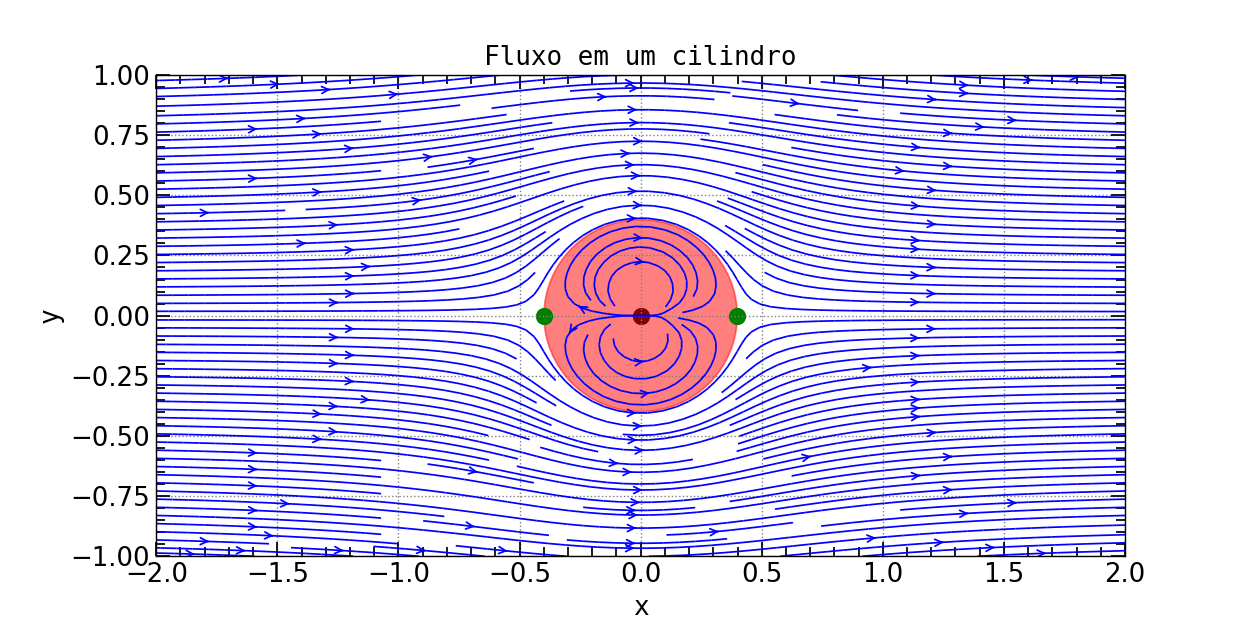

In [17]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.streamplot(X, Y, u, v, 
               color = 'blue', density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
plt.scatter(x_doublet, y_doublet, color = 'black', s = 80, marker = 'o')

plt.title('Fluxo em um cilindro', family = 'monospace', fontsize = 15)
plt.xlabel('x', family = 'monospace', fontsize = 15)
plt.ylabel('y', family = 'monospace', fontsize = 15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Calcula o raio do cilindro e adicione o cilindro à figura
R = np.sqrt(kappa / (2 * np.pi * u_inf))
circle = plt.Circle((0, 0), radius = R, color = 'red', alpha = 0.5)
plt.gca().add_patch(circle)

# Calcula os pontos de estagnação e adicione-os à figura
x_stagn1, y_stagn1 = + np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = - np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color = 'green', s = 80, marker = 'o')

opt_plot()

plt.savefig('Fluxo em um cilindro.png', dpi = 600, format = 'png')

Legal! Temos um fluxo cilíndrico.

Agora, vamos adicionar um vórtice localizado na origem com uma força positiva $\Gamma$. Em coordenadas cartesianas, a função de fluxo e as componentes da velocidade são dadas por:

$$\psi(x,y) = \frac{\Gamma}{4\pi}\ln{(x^2+y^2)}$$

$$u(x,y) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}\text{ }\text{ },\text{ }\text{ }v(x,y) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

Com base nessas equações, definimos as funções `get_velocity_vortex()` e `get_stream_function_vortex()` para fazer... bem, o que é óbvio pelos nomes das funções (você deve sempre tentar criar nomes óbvios para suas funções). Brinque com o valor de $\Gamma$ e recalcule o fluxo. Veja o que acontece. 

In [18]:
gamma = 4.0                      
x_vortex, y_vortex = 0.0, 0.0    


def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength / (2 * np.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = - strength / (2 * np.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength / (4 * np.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi


u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

Agora que temos todos os ingredientes necessários (fluxo uniforme, dipolo e vórtice), aplicamos o princípio da superposição.

In [19]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

Por fim, fazemos um belo gráfico.

<IPython.core.display.Javascript object>


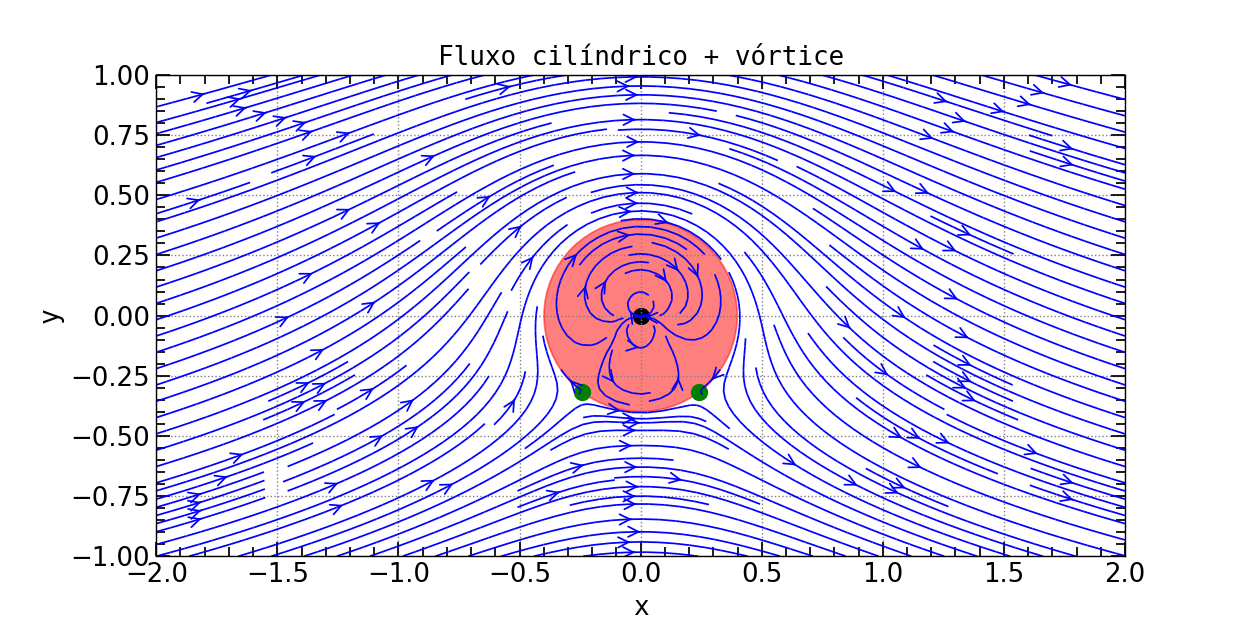

In [20]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.streamplot(X, Y, u, v,
                  color = 'blue', density = 2, linewidth = 1, arrowsize = 1.5, arrowstyle = '->')

plt.title('Fluxo cilíndrico + vórtice', family = 'monospace', fontsize = 15)
plt.xlabel('x', family = 'monospace',fontsize = 15)
plt.ylabel('y', family = 'monospace', fontsize = 15)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

R = np.sqrt(kappa / (2 * np.pi * u_inf))
circle = plt.Circle((0.0, 0.0), radius=R, color='red', alpha=0.5)
plt.gca().add_patch(circle)

x_stagn1, y_stagn1 = (+ np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))
x_stagn2, y_stagn2 = (- np.sqrt(R**2 - (gamma / (4 * np.pi * u_inf))**2),
                      -gamma / (4 * np.pi * u_inf))
plt.scatter(x_vortex, y_vortex, color = 'black', s = 80, marker = 'o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color = 'green', s = 80, marker = 'o')

opt_plot()

plt.savefig('Fluxo cilíndrico + vórtice.png', dpi = 600, format = 'png')

#### Para refletir...

Um dos problemas propostos na seção 3 do `Notebook` [Fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) [1] era calcular o raio do cilindro criado por um dipolo em um fluxo uniforme. Caso você tenha feito, você deve ter conseguido o seguinte resultado

$$R=\sqrt{\frac{\kappa}{2\pi U_{\infty}}}$$

O problema agora é descobrir onde estão localizados os pontos de estagnação na superfície do cilindro, quando há um vórtice (você só precisa de uma expressão para os ângulos).

O que acontece nas condições em que

$$\frac{\Gamma}{4\pi U_{\infty}R}>1$$

Volte e experimento um valor $\Gamma$ que causa isso.

### 3.2 Coeficiente de pressão

Vamos pegar o coeficiente de pressão na superfície do cilindro e comparar com o caso sem um vórtice. As componentes da velocidade em coordenadas polares para o fluxo livre combinado com um dipolo e um vórtice são dadas por

$$u_r(r,\theta) = U_\infty \cos{\theta}\Bigg(1-\frac{R^2}{r^2}\Bigg)$$

$$u_\theta(r,\theta) = -U_{\infty}\sin{\theta}\Bigg(1+\frac{R^2}{r^2}\Bigg) - \frac{\Gamma}{2\pi r}$$

onde $R$ é o raio do cilindro.

Vemos que a componente radial desaparece na superfície do cilindro, enquanto a velocidade tangencial é dada por

$$u_\theta(R,\theta) = -2U_{\infty}\sin{\theta}-\frac{\Gamma}{2\pi R} $$

Como pode-se notar, quando não há um vórtice, a velocidade tangencial no cilindro se torna

$$u_{\theta}(R,\theta)=-2U_{\infty}\sin{\theta}$$

Como discutido na seção 3 do `Notebook` [Fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) [1], sabemos que o coeficiente de pressão é definido por

$$C_{p}=1-\frac{U^2}{U_{\infty}^2}$$

onde $U^{2}=u^{2}+v^{2}=u_{r}^{2}+u_{\theta}^2$

Vamos plotar o coeficiente de pressão em função do ângulo

<IPython.core.display.Javascript object>


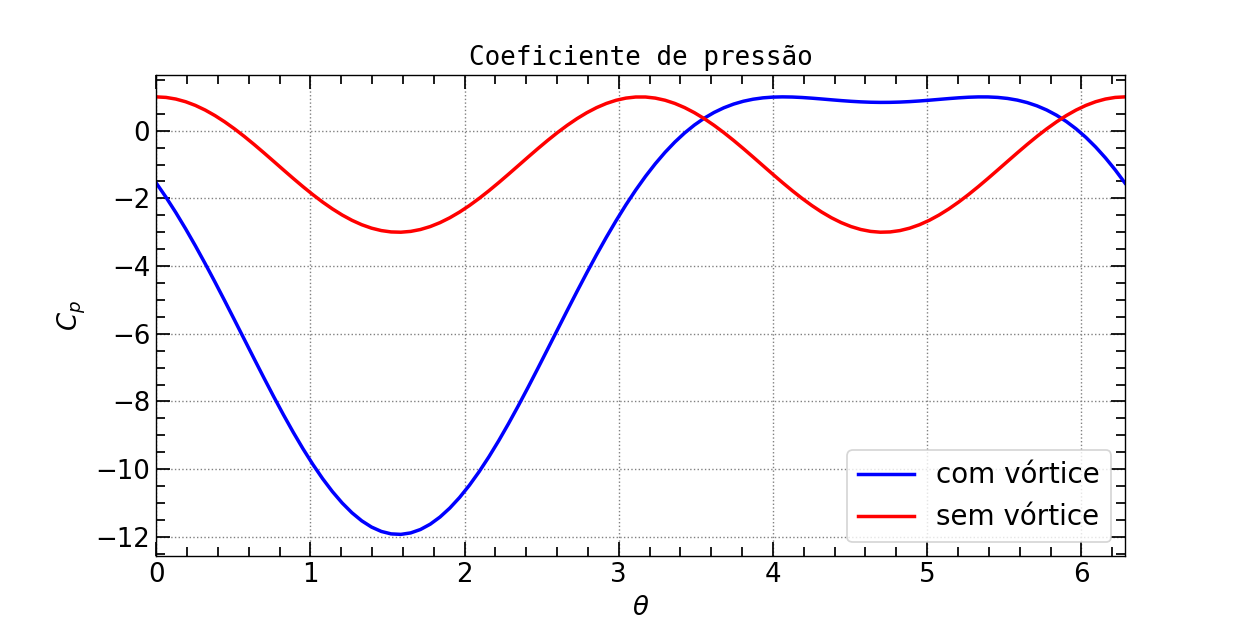

In [21]:
theta = np.linspace(0.0, 2 * np.pi, 100)
u_theta = -2 * u_inf * np.sin(theta) - gamma / (2 * np.pi * R)

cp = 1.0 - (u_theta / u_inf)**2

# Caso em que não há um vórtice
u_theta_no_vortex = -2 * u_inf * np.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

plt.figure(figsize = (10, 5))
plt.plot(theta, cp, label = 'com vórtice', color = 'blue', linewidth = 2, linestyle = '-')
plt.plot(theta, cp_no_vortex, label='sem vórtice', color = 'red', linewidth = 2, linestyle = '-')
plt.legend(loc = 'best', prop = {'size':16})

plt.title(r'Coeficiente de pressão', family = 'monospace', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel(r'$C_p$', fontsize = 15)
plt.xlim(theta.min(), theta.max())

opt_plot()

### 3.3 Sustentação e Arrasto

A sustentação é a componente da força perpendicular a $U_{\infty}$, enquanto o arrasto é a componente paralela a $U_{\infty}$. Como poderíamos obtê-los com as informações que temos acima?

Bem, a força no cilindro é um produto da pressão agindo em sua superfície (não há viscosidade aqui: o fluxo é ideal). Se você desenhar um diagrama de corpo livre, verá que:

$$D=-\int_{0}^{2\pi}P\cos{\theta}Rd\theta$$

$$L=-\int_{0}^{2\pi}P\sin{\theta}Rd\theta$$

#### Para refletir...

Usando a equação de Bernoulli, substitua $P$ na equações acima para obter a sustentação e o arrasto.

o que isto significa fisicamente?

### 3.4 Efeito Magnus

A força experimentada por um cilindro giratório (ou esfera, ou qualquer objeto) é conhecida como *efeito Magnus*.

Acredite ou não, alguém realmente tentou construir um avião com este conceito: cilindros giratórios como "asas". De acordo com um artigo no [PilotFriend](http://www.pilotfriend.com/photo_albums/potty/2.htm) [4], um avião chamado 921-V foi construído em 1930 e voou "pelo menos uma vez" antes de cair.

![image](https://media.giphy.com/media/Isnsaxo0MRLTwqrm6x/giphy.gif)

E hoje em dia, um punhado de amadores constrói *"rotorwings"* RC aproveitando o efeito Magnus para coletar visualizações no YouTube [5]...

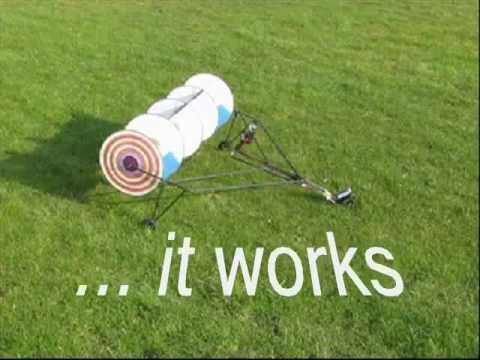

In [22]:
YouTubeVideo('POHre1P_E1k')

---

## 4. Para raciocinar um pouco mais: A transformação de Joukowski

No `Notebook` [Fontes, sumidouros e dipolos](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb) [1] lhe foi mostrado como representar um fluxo potencial em torno de um cilindro 2D por meio da sobreposição dupla e um fluxo livre. Neste `Notebook` lhe foi ensinado que adicionando uma singularidade de vórtice, é possível obter uma sustentação ao redor do cilindro. Entretanto, você pode estar se perguntando: *tudo isso é útil?*

Veja como tudo começa a ficar útil. Usando algumas técnicas de Cálculo de Variáveis Complexas, podemos gerar o escoamento em torno de alguns aerofólios começando com o escoamento em torno de cilindros 2D. O truque é usar um [*mapa conforme*](https://www.sciencedirect.com/topics/engineering/conformal-mapping) (uma função complexa que preserva ângulos) [6] para se mover do plano do cilindro para o plano do aerofólio.

Vamos explorar este método clássico!

### 1.1 Introdução

Você aprendeu como construir um fluxo potencial sobre um cilindro através da superposição de um fluxo livre e uma singularidade dupla (dipolo). Você tamb´me aprendeu que adicionar um vórtice pode gerar uma sustentação no cilindro. Mas qual é o problema? O que podemos fazer com esse fluxo potencial do cilindro?

Nos anos em que os computadores não estavam disponíveis, dinamicistas de fluídos, físicos e matemáticos usavam uma ferramenta poderosa - *a análise complexa* - para estudar potenciais sem resolver as equações diferenciais parciais governantes. Com a mágica da análise complexa e a conhecida solução de escoamento potencial sobre um cilindro, eles poderiam facilmente obter vários tipos de escoamentos potenciais externos, incluindo escoamentos sobre diversos tipos de aerofólios.

Hoje em dia, porém, não se usa muito essas ferramentas mágicas (pelo menos no âmbito da Aerodinâmica). Mas, não apenas por nostalgia, ainda é interessante conhecer o conceito básico por trás da mágica: *mapeamentos conformes*. Nesta seção, irei guiá-lo passo a passo para obter o fluxo potencial sobre um aerofólio começando com o fluxo sobre um cilindro e o famoso mapeamento conforme chamado de **transformação de Joukowski**. Você perceberá como o fluxo potencial do cilindro é importante na história da Aerodinâmica!

Não se preocupe, diferentemente da Seção 2, aqui não vamos focar muito na Matemática. E você também não vai precisar calcular à mão como os pioneiros da Aerodinâmica fizeram. Basta seguir os passos e deixar o Python fazer o trabalho pesado.

### 4.2 Números complexos em Python

Vamos começar com dois planos complexos, um definido pelos pontos $z=x+iy$, e o outro definido pelos pontos $\xi=\xi x+i\xi y$. A transformação de Joukowski pega um ponto no plano $z$ e o "mapeia" para o plano $\xi$ por:

$$\boxed{\xi=z+\frac{c^{2}}{z}}$$

onde $c$ é um parâmetro constante. Antes de discutirmos a transformação de Joukowski, vamos ganhar alguma prática com números complexos em Python.

Usando números complexos, sua função para a transformação de Joukowski parecerá muito simples e você não precisará calcular as partes real e imaginária separadamente.

O Python (e, portanto, `NumPy`) pode lidar com números complexos de forma imediata. Mas o número imaginário, $i=\sqrt{-1}$, é representado por `j`, não `i`, para evitar conflitos com o uso comum de `i` em iterações.

Caso você não tenha os usado antes, tente algumas manipulações simples de números complexos agora. Por exemplo, digite o seguinte em um bloco de células:

```Python
3 + 2j
```

Agora tente:

```Python
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('O tipo da variável é ', type(z))
```

#### Para fixar as ideias...

Familiarize-se com as operações de números complexos em Python respondendo o seguinte:

1. $(2.75+3.69i)\cdot(8.55-6.13i);$

2. $1.4\cdot e^{i5.32};$

3. $\frac{7.51-9.15i}{4.43+9.64i}.$

### 4.3 Formas criadas pela transformação de Joukowski

Comece escrevendo uma função Python que recebe `z` e `c` como parâmetros e retorna a transformação de Joukowski de `z`.

Podemos gerar vários padrões usando transformadas de Joukowski. Use sua função Python para realizar os cálculos descritos abaixo e responda às pertuntas.

Apenas tome $c=1$ aqui para simplificar.

1. No plano $z$, coloque um círculo com raio $R$ maior que $c=1$, digamos $R=1.5$, centrado na origem. Como é a forma quando mapeada no plano $\xi$?

> A. Círculo \
> B. Elipse \
> C. Aerofólio simétrico \
> D. Aerofólio arqueado.

2. Agora, coloque um círculo no plano $z$ com raio tal que $c<R<2c$ (por exemplo, $c=1$; $R=1.2$), centrado em $(x_{c},y_{c})=(c-R,0)$. Como é a forma no plano $\xi$?

> A. Círculo \
> B. Elipse \
> C. Aerofólio simétrico \
> D. Aerofólio arqueado.

3. Ponha um círculo em $(x_{c},y_{c})=(-\Delta x,\Delta y)$, onde $\Delta x$ e $\Delta y$ são pequenos números positivos, e $\Delta x=0.1$ e $\Delta y=0.1$. O raio $R$ do círculo é $R=\sqrt{(c-x_{c})^{2}+y_{c}^{2}}$. Como é a forma do plano $\xi$?

> A. Círculo \
> B. Elipse \
> C. Aerofólio simétrico \
> D. Aerofólio arqueado.

Considere o caso quando você obtém um aerofólio simétrico. Em coordenadas polares, $(\theta,r=R)$, qual ponto do círculo corresponde ao bordo de fuga do aerofólio?

- $\theta=\text{ }?$

### 4.4 Pontos de grade no plano $z$ usando coordenadas polares

Pela transformação de Joukowski, um ponto no plano $z$ corresponde a um ponto $\xi$. Como você viu na seção anterior, essa transformação às vezes dá uma forma que se parece muito com um aerofólio. Qual é a utilidade?

Acontece que na análise complexa, quando você tem uma solução para a equação de Laplace no plano complexo e aplica um [mapeamento conforme](https://www.sciencedirect.com/topics/engineering/conformal-mapping) [6], a função transformada ainda é uma solução da equação de Laplace.

Isso significa que podemos mapear a função potencial e as linhas de fluxo sobre um cilindro no plano $z$ para o plano $\xi$ e obter as linhas de fluxo sobre um aerofólio. A função de fluxo ao redor do aerofólio será dada por:

$$\psi(\xi_{x},\xi_{y})=\psi(\xi_{x}(x,y),\xi_{y}(x,y))$$

onde as coordenadas complexas de $\xi,\xi_{x},\xi_{y}$, são obtidas a partir da transformação de Joukowski de $z=x+iy$.

Neste exercício, você obterá o escoamente sobre um aerofólio Joukowski simétrico com ângulo de ataque zero e diferente zero. Obtemos a forma do nosso aerofólio alvo colocando um cilindro centrado em $(x_{c},y_{c})=(-0.15,0)$ com raio $R=1.15$ e parâmetro $c=1$. Você alcançará a meta passo a passo com os problemas (3) e (6).

Primeiro, construa um conjunto de pontos de grade no plano $z$ e veja como esses pontos se parecem no plano $\xi$. Use coordenadas polares para construir sua grade no plano $z$. Se você colocar pontos de grade dentro do cilindro, eles acabarão fora do aerófolio após uma transformação de Joukowski (tente você mesmo!). Isto é um problema. As linhas de corrente dentro do cilindro não são físicas, então vamos ignorar essa região.

#### Para exercitar!

1. Construa uma grade em coordenadas polares no plano $z$. Use $N_{r}=100$ pontos na direção radial, dentro do intervalo $R\leq r\leq5$, e $N_{\theta}=145$ pontos na direção axial, dentro do intervalo $0\leq\theta\leq2\pi$.

2. Use a transformação de Joukowski para mapear a grade no plano $\xi$.

3. Plote os pontos da grade em ambos os planos usando a função `plt.scatter()`.

Você deve obter figuras que se assemelham com isso:

![image](https://media.giphy.com/media/4pwrwnv4W2tEPLihhR/giphy.gif)

### 4.5 Fluxo sobre um aerofólio Joukowski simétrico com ângulo de ataque zero

#### 4.5.1 Função de fluxo e linhas de fluxo

Agora, você avaliará o fluxo potencial sobre um cilindro no plano $z$. Como mencionado acima, $\psi(\xi)=\psi(\xi(z))$. Isso significa que, após avaliar a função de fluxo em um determinado ponto do plano $z$, o ponto correspondente no plano $\xi$ tem o mesmo valor da função de fluxo. Podemos plotar as linhas de corrente em ambos os planos usando a função `plt.contour()`, porque a função de fluxo é uma função escalar.

Use 1 como a velocidade do fluxo livre, ou seja, $U_{\infty}=1$. Você tem que calcular a força do dipolo primeiro para ter um cilindro com raio $R=1.15$.

Você deve obter padrões aerodinâmicos semelhantes aos mostrados nas figuras a seguir:

![image](https://media.giphy.com/media/fJK1uneWansD68gHZN/giphy.gif)

#### 4.5.2 Vetor velocidade e coeficiente de pressão

Para obter os coeficientes de pressão, precisamos calcular os campos de velocidade. Podemos simplesmente obter o campo de velocidade no plano $z$ usando as coordenadas dos pontos da grade no plano $z$. Mas podemos apenas dizer que a velocidade nos pontos correspondentes no plano $\xi$ é a mesma no plano $z$, exatamente como fizemos para a função de fluxo? *A resposta é não!*

Os valores da função de fluxo permanecem os mesmos nos pontos originais e mapeados porque a função a função de fluxo é uma solução escalar da equação de Laplace!

No entanto, a velocidade é um vetor e não é uma solução da equação de Laplace. Quando o sistema de coordenadas muda pelo mapeamento conforme, os valores do vetor no novo sistema são diferentes.

Agora vamos voltar ao nosso problema: o plano $z$ e o plano $\xi$ são dois sistemas de coordenadas diferentes. A velocidade em um ponto específico no plano $z$ não é a mesma que no ponto correspondente no plano $\xi$. Alguma manipulação deve ser feita.

Lembramos que o potencial de velocidade, $\phi$, também é uma solução da equação de Laplace; portanto, os valores potenciais permanecem os mesmos em um ponto sob a transformação conforme. O mesmo se aplica ao potencial complexo, $F(z)=F(\xi(z))=\phi+i\psi$.

A velocidade complexa no plano $z$ é definida por:

$$W_{z}=\frac{dF}{dz}=u_{z}-iv_{z}$$

onde $u_{z}=\frac{\partial\psi}{\partial y}$ e $v_{z}=-\frac{\partial\psi}{\partial x}$.

Podemos obter a velocidade complexa no plano $\xi$, $W_{\xi}=u_{\xi}-iv_{\xi}$, aplicando a regra da cadeia:

$$W_{\xi}=\frac{dF}{d\xi}=\frac{dF}{dz}\times\frac{dz}{d\xi}=\frac{dF}{dz}/\frac{d\xi}{dz}=W_{z}/\frac{d\xi}{dz}$$

onde

$$\frac{d\xi}{dz}=\frac{d\Big(z+\frac{c^{2}}{z}\Big)}{dz}=1-\Bigg(\frac{c}{z}\Bigg)^{2}$$

Uma vez que temos os campos de velocidade, podemos obter o coeficiente de pressão em cada plano.

O campo de velocidade em cada plano deve ficar assim (usando a função `plt.quiver()`):

![image](https://media.giphy.com/media/kyJXuskJmpbWn2YnGd/giphy.gif)

O coeficiente de pressão em cada plano deve ficar assim (usando a função `plt.contour()`):

![image](https://media.giphy.com/media/1f9MrMkXdPZEX5qVxX/giphy.gif)

#### Para exercitar!

- Escreva o código Python para obter as figuras mostradas acima (linhas de corrente, campo de velocidade e coeficiente de pressão em ambos os planos). 

- Responda as seguintes questões: 

> 1. Qual é a força do dipolo?

> 2. Qual é a velocidade no $62^{\circ}$ ponto da superfície do aerofólio? (Assumimos que a borda de fuga é o 1º ponto e que indexamos os pontos no sentido anti-horário).

> 3. Qual é o valor mínimo do coeficiente de pressão na superfície do aerofólio?

### 4.6 Escoamento sobre um aerofólio de Joukowski simétrico com ângulo de ataque diferente de zero, sem circulação.

Agora, queremos colocar o aerofólio em um ângulo de ataque $(\text{AoA})$ em relação ao fluxo livre. Claro que podemos usar o fluxo sobre um cilindro e a transformação de Joukowski para fazer isso. Mas como? Podemos sobrepor um fluxo livre com ângulo de entrada diferente de zero e um dipolo para obter o que queremos? Na verdade, não podemos. Se fizermos isso, não conseguiremos obter uma linha de corrente fechada, como fizemos no caso anterior (no qual uma linha de corrente circular fechada pode ser tomada como suerfície cilíndrica).

Uma maneira de obter um fluxo uniforme com um ângulo de ataque é simplesmente girando o plano complexo $z$ para obter um novo plano complexo $z'$, onde o eixo $x'$ (ou seja, parte real de $z'$) é paralelo ao fluxo livre de direção, com sua origem localizada no centro do cilindro $(x_{c},y_{c})$, conforme mostra a figura abaixo.

![image](https://media.giphy.com/media/SaEWxmuFx8oGmOWeyG/giphy.gif)

A relação entre o plano $z'$ e o plano $z$ é:

$$z'=[z-(x_{c}+iy_{c})]e^{-i\times\text{AoA}}$$

isto é

$$\begin{cases}
x'=(x-x_{c})\cos{(\text{AoA})}+(y-y_{c})\sin{(\text{AoA})} \\
y'=-(x-x_{x})\sin{(\text{AoA})}+(y-y_{c})\cos{(\text{AoA})}
\end{cases}$$

Agora, podemos obter o escoamento sobre um cilindro no novo plano $z'$ adicionando uma corrente livre com ângulo de ataque zeero e um dipolo centrado na origem. Então, podemos obter o escoamento no plano $z$ e, finalmente, no plano $\xi$. Novamente, a função de fluxo permanece a mesma no mesmo ponto sob os três sistema de coordenadas $(z',z,\xi)$.

Você deve obter linhas de corrente no plano $z$ e no plano $\xi$ que se parecem com isso:

![image](https://media.giphy.com/media/aTsM7iYdQkRlwIRrmy/giphy.gif)

O vetor velocidade precisa ser girado de volta do plano $z'$ para o plano $z$.

$$W_{z}=\frac{dF}{dz}=\frac{dF}{dz'}\times\frac{dz'}{dz}=W_{z'}e^{-i\times\text{AoA}}$$

Depois de ter a velocidade no plano $z$, você pode usar o que aprendeu no exercício anterior para obter a velocidade no plano $\xi$.

Você deve obter o coeficiente de velocidade e pressão (nos planos $z$ e $\xi$) que se parecem com isso:

![image](https://media.giphy.com/media/Tvr6lscLOmbaMP8pDm/giphy.gif)

![image](https://media.giphy.com/media/lx7WWApe8DK65ZgnSk/giphy.gif)

#### Para exercitar!

- Escreva o código Python para obter as figuras mostradas acima (linhas de corrente, campo de velocidades e coeficientes de pressão nos planos $z$ e $\xi$). Defina o ângulo de ataque para $\text{AoA}=20^{\circ}$.

- Responda as seguintes questões:

> 1. Você acha que o fluxo sobre o aerofólio parece razoável? Explique por quê.

> 2. Quais são os índices dos pontos de estagnação no aerofólio? (Assumimos que a borda de fuga é o 1º ponto e que indexamos os pontos no sentido anti-horário).

> 3. Quanto é a sustentação? A sustentação, $L=-\oint P\times\sin{\theta}\text{d}A$, é perpendicular à direção do fluxo livre.

> 4. Quanto é o arrasto? O arrasto, $D=-\oint P\times\cos{\theta}\text{d}A$, está na direção do fluxo livre.

> 5. Qual é a velocidade no ponto 50 do aerofólio?

> 6. Qual é o coeficiente de pressão no ponto 75 do aerofólio?

### 4.7 Escoamento sobre um aerofólio de Joukowski simétrico com ângulo de ataque diferente de zero, com circulação

O fluxo obtido no último exercício não é físico. O que precisamos é de um vórtice. Na seção 3, vimos que, adicionando um vórtice (ou seja, circulação) a um fluxo potencial sobre um cilindro, podemos modificar a posição dos pontos de estagnação e gerar sustentação.

Para tornar o fluxo mais físico, precisamos satisfazer a [condição de Kutta](https://www.sciencedirect.com/topics/engineering/kutta-condition) [7].

> " Um corpo com uma borda de fuga afiada que se move através de um fluído criará em torno de si uma circulação de força suficiente para manter o ponto de estagnação traseiro na borda de fuga. "

Essa condição nos ajuda a escolher a força do vórtice a ser adicionada. A força do vórtice deve ser calculada de modo que o ponto de estagnação traseira no cilindro se mova de $\theta=\text{AoA}$ para $\theta=0^{\circ}$ no plano $z$. Você deve ser capaz de calcular a força com o que aprendeu na seção 3.

As linhas de corrente, velocidade e coeficiente de pressão no plano $z$ e no plano $\xi$ devem ser assim:

![image](https://media.giphy.com/media/hkz061LMO2ZwcNiF67/giphy.gif)

![image](https://media.giphy.com/media/8LxA4OkZXqMduhY3rM/giphy.gif)

![image](https://media.giphy.com/media/DPKZuFlpKY7zbF9tN9/giphy.gif)

#### Para exercitar!

- Escreva o código Python para obter as figuras mostradas acima (linhas de corrente, campo de velocidade e coeficiente de pressão nos planos $z$ e $\xi$). Defina o ângulo de ataque para $\text{AoA}=20^{\circ}$.

- Responda as seguintes questões:

> 1. Qual é a força do vórtice?

> 2. Quanto é a sustentação? Ela está de acordo com o teorema de Kutta-Joukowski? A sustentação, $L=-\oint P\times\sin{\theta}\text{d}A$, é perpendicular à direção do fluxo livre.

> 3. Quanto é o arrasto? O arrasto, $D=-\oint P\times\cos{\theta}\text{d}A$, está na direção do fluxo livre.

> 4. Quais são os índices dos pontos de estagnação no aerofólio? (Assumimos que a borda de fuga é o $1^{\circ}$ ponto e que indexamos os pontos no sentido anti-horário).

> 5. Qual é a velocidade no ponto 92 do aerofólio?

> 6. Qual é o coeficiente de pressão no ponto 11 do aerofólio?

> 7. Explique o que está acontecendo com o coeficiente de pressão no bordo de fuga do aerofólio.

---

## Referências

- [1] *Fontes, sumidouros e dipolos*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Fontes%2C%20Sumidouros%20e%20Dipolos.ipynb 

- [2] *YouTube Video: 9. Vorticity (1 of 2)*: https://www.youtube.com/watch?v=loCLkcYEWD4

- [3] *Irrotational vortices:* https://en.wikipedia.org/wiki/Vortex#Irrotational_vortices

- [4] *Spinning (Cylinder-) Wings  -  The Magnus - Robbins Effect*: http://www.pilotfriend.com/photo_albums/potty/2.htm

- [5] *YouTube Video: ROTORWING Part 7 BICONVEX - SAVONIUS - ROTOR WITH LANDING GEAR RC - Experimental*: https://www.youtube.com/watch?v=POHre1P_E1k&feature=emb_title

- [6] *Conformal Mapping*: https://www.sciencedirect.com/topics/engineering/conformal-mapping

- [7] *Kutta Condition*: https://www.sciencedirect.com/topics/engineering/kutta-condition

---